<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch5_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch5 - Notebook : Suites**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

### 1. Approximations de $\phi$ ###

**<span style="color: #D17460">1Spé - TSpé - TCompl </span>**

**_1.a. Par une suite récurrente simple (aisément généralisable à toute suite récurrente du type u<sub>n+1</sub> = f(u<sub>n</sub>) )_**

In [ ]:
def f(x):
    f = sqrt(x+1)
    return f

u = 5
for k in range (1,10):
    u = f(u)
    print('u',k,' = ',u,'   précision : 10^',round(log(abs(u - (1+sqrt(5))/2))/log(10)))

u 1  =  2.449489742783178    précision : 10^ 0
u 2  =  1.8572802003960462    précision : 10^ -1
u 3  =  1.6903491356509892    précision : 10^ -1
u 4  =  1.640228379114015    précision : 10^ -2
u 5  =  1.624877958221483    précision : 10^ -2
u 6  =  1.620147511253677    précision : 10^ -3
u 7  =  1.6186869713609475    précision : 10^ -3
u 8  =  1.6182357588932916    précision : 10^ -4
u 9  =  1.6180963379518822    précision : 10^ -4


**_Construction graphique des termes de la suite_**

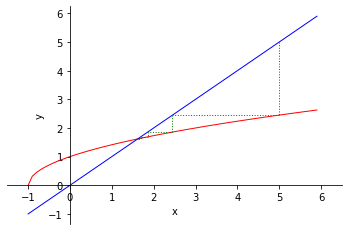

In [ ]:
xx = np.arange(-1,6,0.1)
yy = []
ii = []
for ix in xx :
    yy.append(sqrt(ix+1))
    ii.append(ix)
    
p1 = plt.plot(xx,yy,'r',linewidth=1)
p2 = plt.plot(xx,ii,'b',linewidth=1)

u = 5
x = range(5)

for k in x :
    y = sqrt(u+1)
    plt.plot(u,y,'r')
    plt.plot([u,y],[y,y],'g',linewidth=1,linestyle = ':')
    plt.plot([u,u],[u,y],'g',linewidth=1,linestyle = ':')
    u = sqrt(u+1)


plt.xlabel('x')
plt.ylabel('y')
#plt.axis([-1.5,6,0,4])

ax = plt.gca() # récupération du paramétrage des axes

ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
ax.spines['top'].set_color('none')

plt.xlim(-1.5,6.5) # dimensionnement de l'axe des abscisse, celui des ordonnées sera dimensionné automatiquement

plt.show()

**_1.b. Par une suite récurrente linéaire d'ordre 2_**

**<span style="color: #D17460">TSpé - TCompl : suite récurrente linéaire d'ordre 2</span>**


Dans la suite de **Fibonnacci (1170-1240)**, le rapport de deux termes consécutifs tend vers $\phi$, c'est l'occasion de programmer une telle suite...

In [ ]:
a = 1
b = 1

print('F 0 = 1')
print('F 1 = 1  , r 1 = 1')
for k in range (2,10):
    r = b/a
    F = a + b
    print('F',k,'=',F,'  , r',k,'=',r)
    a = b
    b = F


F 0 = 1
F 1 = 1  , r 1 = 1
F 2 = 2   , r 2 = 1.0
F 3 = 3   , r 3 = 2.0
F 4 = 5   , r 4 = 1.5
F 5 = 8   , r 5 = 1.6666666666666667
F 6 = 13   , r 6 = 1.6
F 7 = 21   , r 7 = 1.625
F 8 = 34   , r 8 = 1.6153846153846154
F 9 = 55   , r 9 = 1.619047619047619


**_1.c. seuil_**

La suite F <sub>n</sub> étant de sens alterné, oscillant autour de $\phi$, on peut calculer un seuil pour obtenir une précision cherchée en considérant l'écart entre deux termes consécutifs.


**<span style="color: #26B260">Python : boucle *while* pour la recherche de seuil</span>**

In [ ]:
a = 1
b = 1
r = b/a
old = 2
k = 2

#nb_decimales = int(input('Entrez la précision cherchée, nombre de chiffres après la virgule : '))
nb_decimales = 9

while abs(old - r)> 10**(-nb_decimales):
    old = r
    k = k+1
    F = a + b
    a = b
    b = F
    r = b/a
    #print(r)
    
print('À 10^-',nb_decimales,' près, une valeur approchée de Phi est : ',round(r,nb_decimales) , ' obtenue après ',k,' itérations.')
# résultat formaté selon la précision cherchée

À 10^- 9  près, une valeur approchée de Phi est :  1.618033989  obtenue après  25  itérations.


**_1.d. Représentation graphique_**

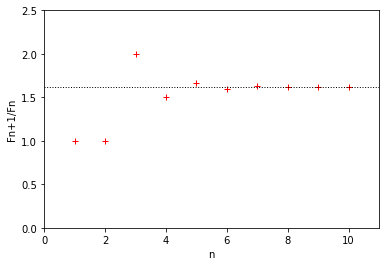

In [ ]:
a = 1
b = 1
r = [1]

for k in range (2,11):
    r.append(b/a)
    F = a + b
    a = b
    b = F
#print(r)

x = range(1,11)
plt.plot(x,r,'r',marker = "+",linestyle = 'None')

phi = (1+sqrt(5))/2

plt.plot([0,11],[phi,phi],'k',linewidth = 1,linestyle = ':')

plt.xlabel('n')
plt.ylabel('Fn+1/Fn')
plt.axis([0,11,0,2.5])
plt.show()


**_2. $\pi$ à partir de la moyenne arithmético-géométrique de 1 et $\frac{1}{\sqrt 2}$_**

**<span style="color: #D17460">TSpé - TCompl : moyenne arithmético-géométrique</span>**


Cette méthode est très très rapide, car on double le nombre de décimales exactes à chaque itération.

Elle permet de programmer deux suites définies par des relations de récurrence entrelacées.

In [ ]:
x = 1
c = 1/4
u = 1
v = 1 / sqrt(2)
n = 5

for k in range(1,n+1):
    y = u # stockage de l'ancienne valeur de u
    u = (u+v)/2 # moyenne arithmétique
    v = sqrt(v*y)
    c = c - x*(u-y)**2
    x = 2*x
    p = (u+v)**2/(4*c)
    print('Itération n°',k,'valeur approchée de Pi : ',p, '   précision 10^',round(log(abs(p - pi))/log(10)))



Itération n° 1 valeur approchée de Pi :  3.1405792505221686    précision 10^ -3
Itération n° 2 valeur approchée de Pi :  3.141592646213543    précision 10^ -8
Itération n° 3 valeur approchée de Pi :  3.141592653589794    précision 10^ -15
Itération n° 4 valeur approchée de Pi :  3.141592653589794    précision 10^ -15
Itération n° 5 valeur approchée de Pi :  3.141592653589794    précision 10^ -15
